**Authors:** Riccardo Guidotti, Francesco Spinnato  

In [21]:
import pandas as pd
from sktime.datasets import load_gunpoint
from sktime.clustering.k_means import TimeSeriesKMeans
import seaborn as sns
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering

In [13]:
X_train, y_train = load_gunpoint(split="TRAIN", return_type="numpy3D")
X_train.shape, y_train.shape

((50, 1, 150), (50,))

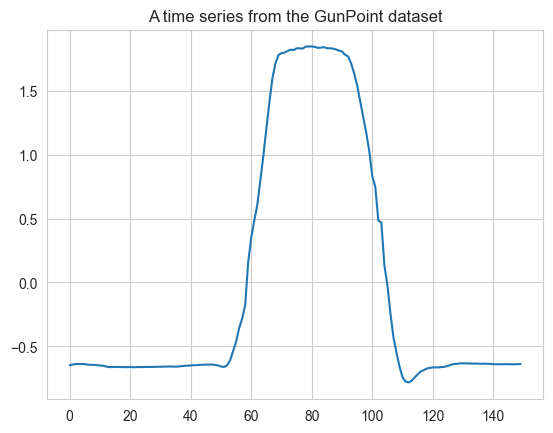

In [25]:
plt.title("A time series from the GunPoint dataset")
plt.plot(X_train[0].T)

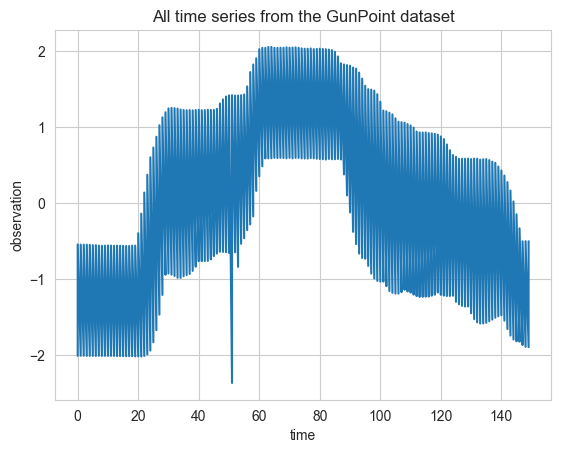

In [40]:
df = pd.DataFrame(np.squeeze(X_train))
df_melt = df.melt(value_name="observation", var_name="time")
sns.lineplot(df_melt, x="time", y="observation", estimator=None)
plt.title("All time series from the GunPoint dataset")
plt.show()

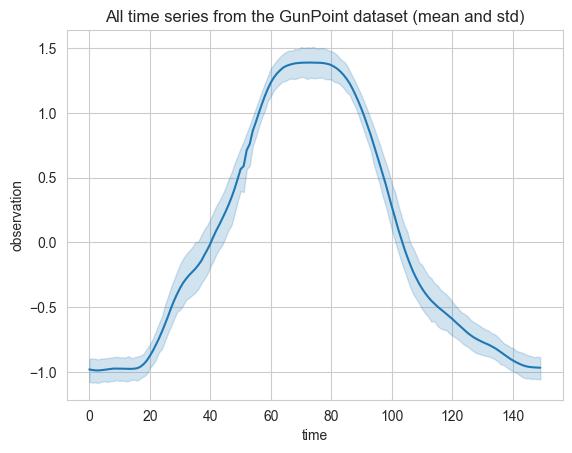

In [42]:
sns.lineplot(df_melt, x="time", y="observation", estimator="mean")
plt.title("All time series from the GunPoint dataset (mean and std)")
plt.show()

## Distance-based Clustering

### Euclidean

In [27]:
clusterer = TimeSeriesKMeans(n_clusters=2, metric="euclidean")

In [28]:
%%time
clusterer.fit(X_train)

CPU times: user 410 ms, sys: 58.2 ms, total: 469 ms
Wall time: 724 ms


TimeSeriesKMeans(metric='euclidean', n_clusters=2)

In [44]:
df["cluster"] = clusterer.labels_
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,cluster
0,-0.647885,-0.641992,-0.638186,-0.638259,-0.638345,-0.638697,-0.643049,-0.643768,-0.645050,-0.647118,...,-0.639716,-0.639735,-0.640184,-0.639235,-0.639395,-0.640231,-0.640429,-0.638666,-0.638657,1
1,-0.644427,-0.645401,-0.647055,-0.647492,-0.646910,-0.643884,-0.639731,-0.638094,-0.635297,-0.635384,...,-0.641426,-0.639267,-0.637797,-0.637680,-0.635260,-0.635490,-0.634934,-0.634497,-0.631596,1
2,-0.778353,-0.778279,-0.777151,-0.777684,-0.775900,-0.772421,-0.765464,-0.762275,-0.763752,-0.765356,...,-0.718712,-0.713534,-0.710021,-0.704126,-0.703263,-0.703393,-0.704196,-0.707605,-0.707120,1
3,-0.750060,-0.748103,-0.746164,-0.745926,-0.743767,-0.743805,-0.745213,-0.745082,-0.745727,-0.745815,...,-0.724661,-0.729229,-0.728940,-0.727834,-0.728244,-0.726453,-0.725517,-0.725191,-0.724679,1
4,-0.599539,-0.597422,-0.599269,-0.598259,-0.597582,-0.591303,-0.589020,-0.587533,-0.585462,-0.583847,...,-0.643885,-0.645742,-0.646458,-0.646464,-0.645585,-0.642412,-0.643337,-0.636803,-0.631716,1


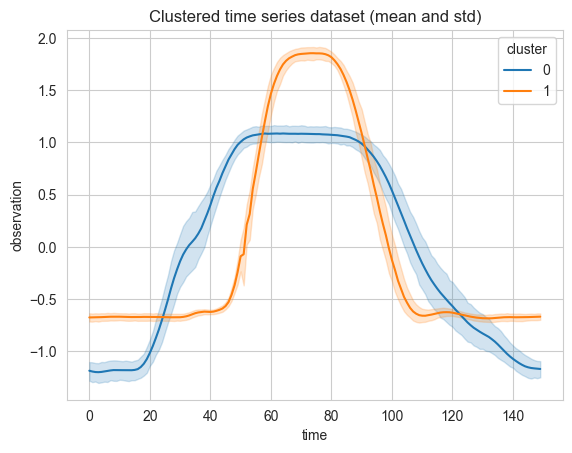

In [39]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

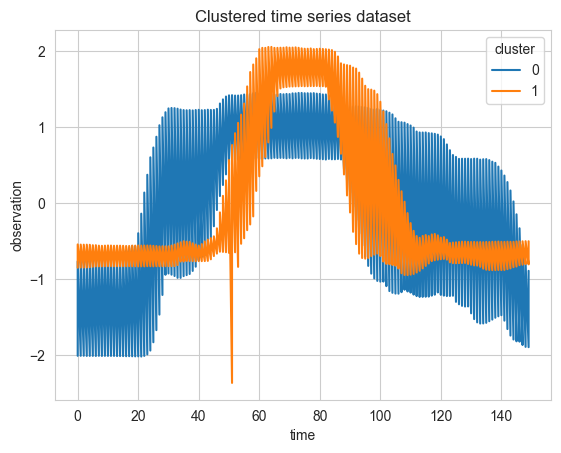

In [38]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

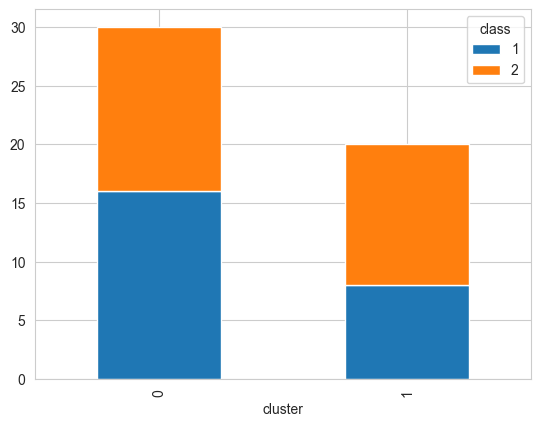

In [50]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)
plt.legend(title="class")

### DTW

In [53]:
clusterer = TimeSeriesKMeans(n_clusters=2, metric="dtw")

In [54]:
%%time
clusterer.fit(X_train)

CPU times: user 1.22 s, sys: 39.4 ms, total: 1.26 s
Wall time: 1.36 s


TimeSeriesKMeans(n_clusters=2)

In [55]:
df["cluster"] = clusterer.labels_
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,cluster
0,-0.647885,-0.641992,-0.638186,-0.638259,-0.638345,-0.638697,-0.643049,-0.643768,-0.645050,-0.647118,...,-0.639716,-0.639735,-0.640184,-0.639235,-0.639395,-0.640231,-0.640429,-0.638666,-0.638657,1
1,-0.644427,-0.645401,-0.647055,-0.647492,-0.646910,-0.643884,-0.639731,-0.638094,-0.635297,-0.635384,...,-0.641426,-0.639267,-0.637797,-0.637680,-0.635260,-0.635490,-0.634934,-0.634497,-0.631596,1
2,-0.778353,-0.778279,-0.777151,-0.777684,-0.775900,-0.772421,-0.765464,-0.762275,-0.763752,-0.765356,...,-0.718712,-0.713534,-0.710021,-0.704126,-0.703263,-0.703393,-0.704196,-0.707605,-0.707120,1
3,-0.750060,-0.748103,-0.746164,-0.745926,-0.743767,-0.743805,-0.745213,-0.745082,-0.745727,-0.745815,...,-0.724661,-0.729229,-0.728940,-0.727834,-0.728244,-0.726453,-0.725517,-0.725191,-0.724679,1
4,-0.599539,-0.597422,-0.599269,-0.598259,-0.597582,-0.591303,-0.589020,-0.587533,-0.585462,-0.583847,...,-0.643885,-0.645742,-0.646458,-0.646464,-0.645585,-0.642412,-0.643337,-0.636803,-0.631716,1


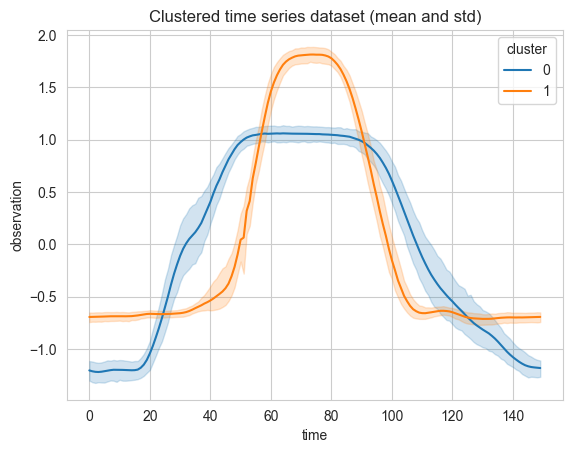

In [56]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

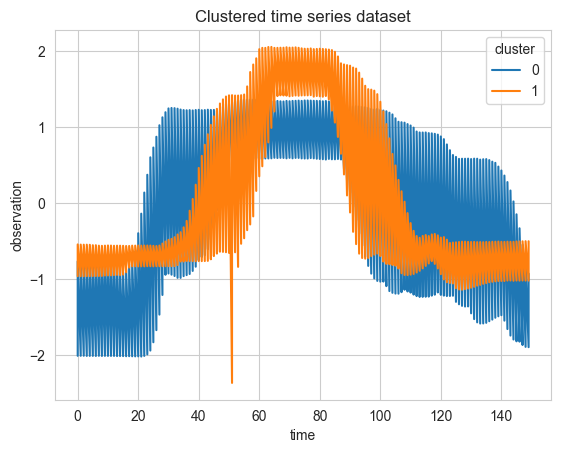

In [57]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

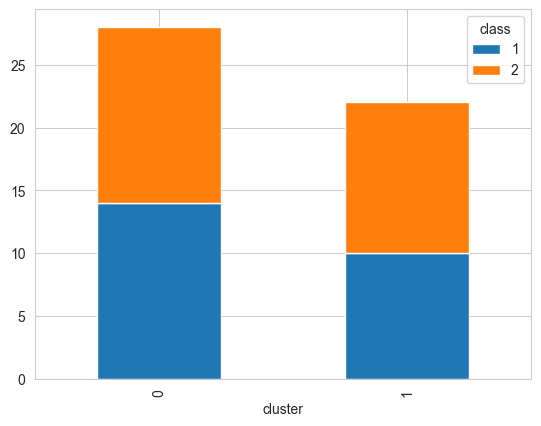

In [58]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)
plt.legend(title="class")

## Features-based Clustering

In [72]:
from sktime.transformations.series.summarize import SummaryTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [60]:
transformer = SummaryTransformer()

In [62]:
F_train = transformer.fit_transform(X_train)
F_train

,mean,std,min,max,0.1,0.25,0.5,0.75,0.9
instances,,,,,,,,,
0,-4.000000e-10,1.0,-0.782461,1.845811,-0.662376,-0.658058,-0.639052,0.785012,1.817564
1,-7.400000e-10,1.0,-0.814203,1.925177,-0.686238,-0.643350,-0.609387,0.719290,1.888367
2,-1.893333e-09,1.0,-0.782672,1.703739,-0.774612,-0.739111,-0.598165,1.096573,1.679056
3,1.586667e-09,1.0,-0.792305,1.783278,-0.745996,-0.741088,-0.559942,0.850966,1.766673
4,2.400000e-09,1.0,-0.733465,2.053367,-0.643583,-0.599016,-0.573590,0.471034,2.024544
5,-1.546667e-09,1.0,-0.826486,1.926847,-0.707283,-0.693540,-0.612306,0.745455,1.893172
6,-6.466667e-10,1.0,-1.363843,0.897586,-1.285373,-1.267215,0.729766,0.886196,0.893341
7,-1.020000e-09,1.0,-2.021844,0.593964,-2.013536,-0.073071,0.562284,0.578491,0.585432
8,3.906667e-09,1.0,-1.115093,1.097158,-1.068247,-1.047886,0.042499,1.059748,1.077842


In [64]:
clusterer = DBSCAN(eps=0.5, min_samples=5)

In [65]:
clusterer.fit(F_train)

DBSCAN()

In [71]:
F_train["cluster"] = clusterer.labels_

In [73]:
pca = PCA(n_components=2)
F_train_pca = pca.fit_transform(F_train)
F_train = pd.concat(
    [F_train, pd.DataFrame(F_train_pca, columns=["pca1", "pca2"])], axis=1
)

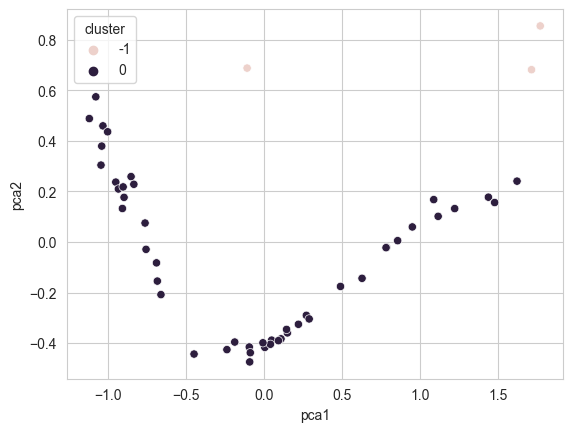

In [75]:
sns.scatterplot(F_train, x="pca1", y="pca2", hue="cluster")
plt.show()

In [67]:
df["cluster"] = clusterer.labels_

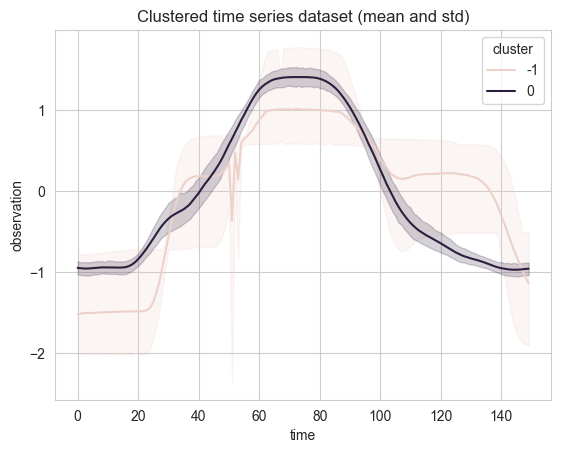

In [68]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

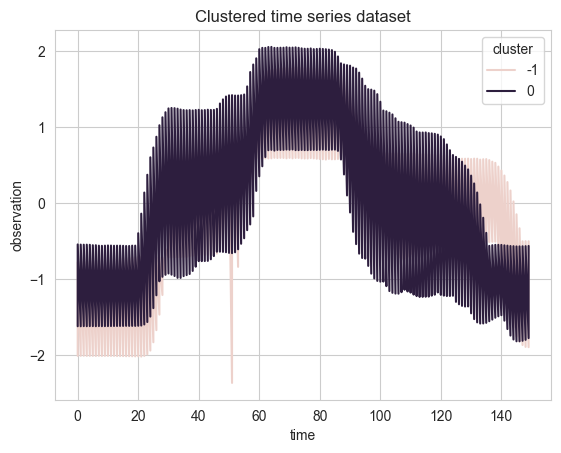

In [69]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

<Axes: xlabel='cluster'>

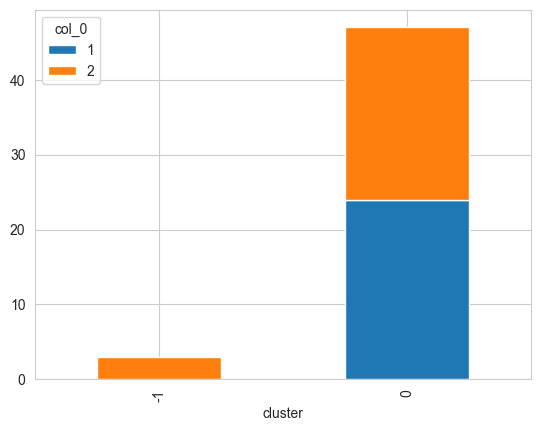

In [70]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)

# Approximated Clustering

In [76]:
from sktime.transformations.panel.dictionary_based import PAA

In [77]:
transformer = PAA(num_intervals=10)

In [102]:
X_paa = transformer.fit_transform(X_train)
df_paa = pd.DataFrame(np.squeeze(X_paa))

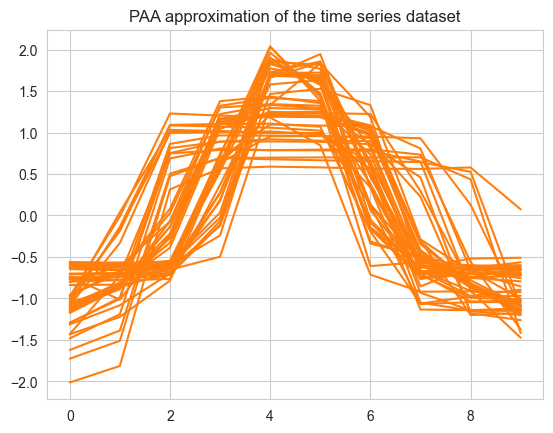

In [89]:
plt.plot(np.squeeze(X_paa.T), color="C1")
plt.title("PAA approximation of the time series dataset")
plt.show()

In [94]:
clusterer = TimeSeriesKMeans(n_clusters=4, metric="dtw")

In [95]:
%%time
clusterer.fit(X_paa)

CPU times: user 5.53 s, sys: 331 ms, total: 5.86 s
Wall time: 5.89 s


TimeSeriesKMeans(n_clusters=4)

In [103]:
df["cluster"] = clusterer.labels_
df_paa["cluster"] = clusterer.labels_

Text(0.5, 1.0, 'Clustered approximated time series dataset (mean and std)')

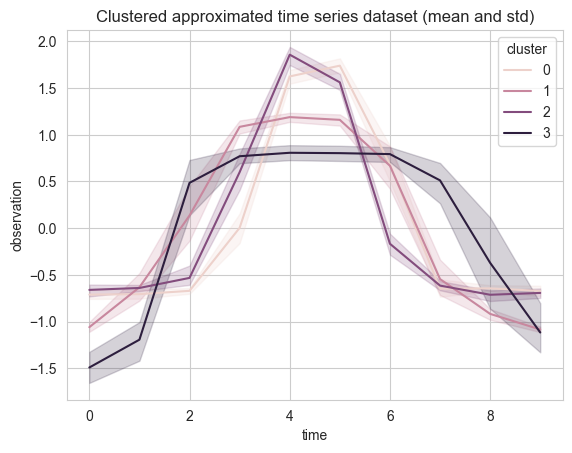

In [104]:
df_melt_paa = df_paa.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt_paa, x="time", y="observation", hue="cluster")
plt.title("Clustered approximated time series dataset (mean and std)")

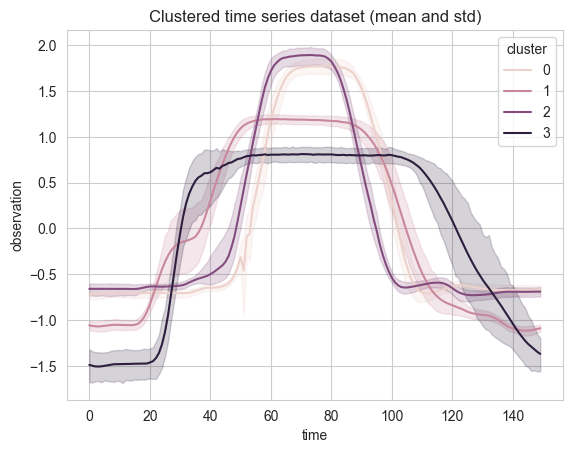

In [97]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()